NAME: RONIT RAJARAM MUNDE

ROLL NO: RBTL22CB071

SUBJECT:MACHINE LEARNING

DATASET NAME: Monkey-Pox PATIENTS Dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

**import pandas as pd:** Data manipulation and analysis with Pandas.

**from sklearn.model_selection import train_test_split:** Data splitting using Scikit-Learn's train_test_split.

**from sklearn.preprocessing import StandardScaler, Binarizer:** Data preprocessing tools for standardization and binarization.

**from sklearn.svm import SVC:** Support Vector Classifier (SVC) for classification.

**from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB:** Naive Bayes classifiers (Gaussian, Multinomial, Bernoulli) for classification.

**from sklearn.metrics import accuracy_score:** Accuracy score calculation for model evaluation.

**import matplotlib.pyplot as** plt: Data visualization with Matplotlib.

**import seaborn as sns:** Enhanced data visualization using Seaborn.

In [ ]:
# Load the data
data = pd.read_csv('DATA.csv')

In [ ]:
data.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [ ]:
data.shape

(25000, 11)

In [ ]:
data.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


<ipython-input-50-69d9f1c4d68e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


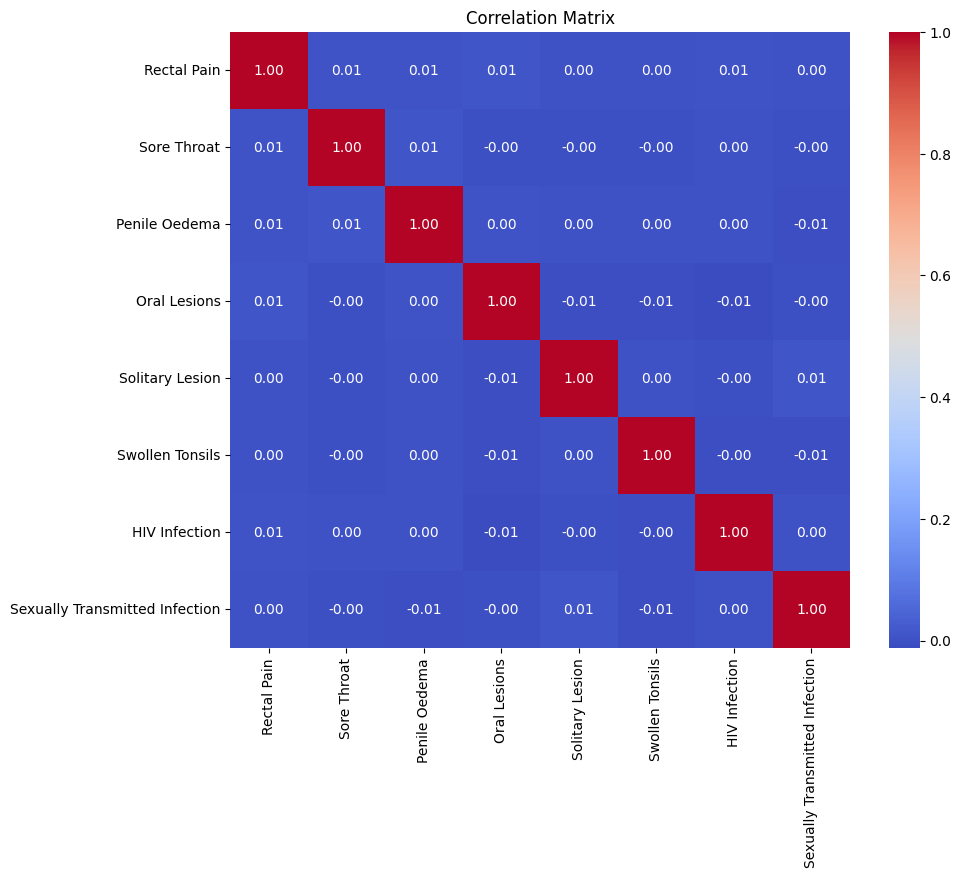

In [ ]:
# Correlation matrix to visualize feature correlations
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

A correlation matrix is a compact table showing the relationships between pairs of variables. It uses correlation coefficients to quantify how two variables move together: positive values indicate a positive relationship, negative values indicate a negative relationship, and zero means no relationship. Correlation matrices are helpful for identifying patterns, dependencies, and potential multicollinearity in data, making them valuable for data analysis and model-building. They are often visualized as heatmaps, where colors represent the strength and direction of the correlations.

In [ ]:
# Replace missing values with appropriate values or 0
data.fillna(data.mean(), inplace=True)

<ipython-input-56-77bb125cc017>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Patient_ID', 'MonkeyPox'])
y = data['MonkeyPox']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the sizes of the training and testing sets
print(f"Training Set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Testing Set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

Training Set: X_train shape = (20000, 12), y_train shape = (20000,)
Testing Set: X_test shape = (5000, 12), y_test shape = (5000,)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardization is a data transformation technique that scales values to have a mean of 0 and a standard deviation of 1. It makes data comparable and brings it to a common scale, regardless of the original units. This process helps in analyzing and comparing features with different measurement scales, making it a fundamental step in various data analysis and machine learning tasks.

In [ ]:
# Binarize features for Bernoulli Naive Bayes
binarizer = Binarizer(threshold=0.5)
X_train_bin = binarizer.transform(X_train)
X_test_bin = binarizer.transform(X_test)

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.7028


A Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates data points into different classes or predicts a numerical value. SVMs aim to maximize the margin between classes while minimizing classification errors. They are particularly effective for high-dimensional data and non-linear problems using kernel functions. SVMs have applications in image classification, text classification, and various real-world problem-solving scenarios.

In [ ]:
# Gaussian Naive Bayes
nb_model_gaussian = GaussianNB()
nb_model_gaussian.fit(X_train, y_train)
nb_pred_gaussian = nb_model_gaussian.predict(X_test)
nb_accuracy_gaussian = accuracy_score(y_test, nb_pred_gaussian)
print(f"Gaussian Naive Bayes Accuracy: {nb_accuracy_gaussian}")

Gaussian Naive Bayes Accuracy: 0.6718


Gaussian Naive Bayes is a classification algorithm based on the Naive Bayes framework. It assumes that feature values follow a Gaussian distribution, making it suitable for continuous data. Like all Naive Bayes methods, it relies on the principle of conditional independence among features. By calculating probabilities, it assigns class labels to data points, and it's commonly used in tasks like text classification and scenarios where the Gaussian distribution assumption holds.

In [ ]:
# Bernoulli Naive Bayes
nb_model_bernoulli = BernoulliNB()
nb_model_bernoulli.fit(X_train_bin, y_train)
nb_pred_bernoulli = nb_model_bernoulli.predict(X_test_bin)
nb_accuracy_bernoulli = accuracy_score(y_test, nb_pred_bernoulli)
print(f"Bernoulli Naive Bayes Accuracy: {nb_accuracy_bernoulli}")

Bernoulli Naive Bayes Accuracy: 0.6952


Bernoulli Naive Bayes is a classification algorithm, a variant of Naive Bayes, designed for binary feature data where each feature is binary (0 or 1). It calculates the probability that a data point belongs to a specific class based on these binary features. It assumes conditional independence among features given the class. It is widely used in text classification tasks, such as spam detection and sentiment analysis, where binary features often represent the presence or absence of specific words or characteristics in documents.

In [ ]:
# Plot the accuracies
models = ['SVM', 'Gaussian NB', 'Bernoulli NB']
accuracies = [svm_accuracy, nb_accuracy_bernoulli,nb_accuracy_gaussian]

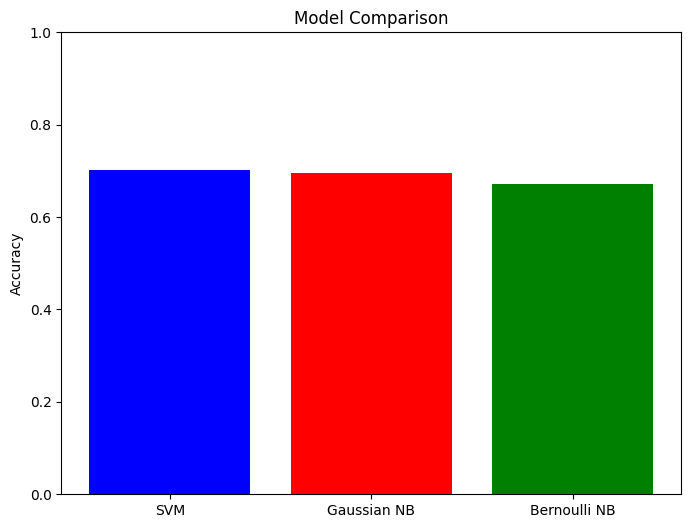

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'red', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0-1 for accuracy
plt.show()

**CONCLUSION:**
Three machine learning models were evaluated: Bernoulli Naive Bayes, Gaussian Naive Bayes, and SVM (Support Vector Machine).
The SVM model achieved the highest accuracy of 0.7028.
The Bernoulli Naive Bayes model had the second highest accuracy of 0.6952.
The Gaussian Naive Bayes model had the lowest accuracy of 0.6718.
Overall, the SVM model performed the best with an accuracy of 70.28% on the given data.
The Bernoulli Naive Bayes and Gaussian Naive Bayes models also performed decently with accuracies in the high 60s%.
For this particular dataset and problem, the SVM model seems to be the most effective among the 3 models tested based on its highest accuracy.
In summary, the SVM model with an accuracy of 0.7028 is the best performing model of the three evaluated based on the accuracy results provided. The SVM would be the recommended model to use for this problem.